# Data Access: Ways to bring data into the Biomedical Research Hub (BRH) workspace
As a new user, you may be interested in exploring different ways to access data in BRH. In this notebook we will use some open access data to demonstate a few different ways to bring data into the BRH workspace and use the Gen3 SDK to download files: 
1. Using a downloaded manifest.json (Manifest)
2. Download a single file using its identifier (Single file)
3. Open project in workspace
4. Download zip files using Gen3 SDK
5. Using the gen3 SDK and GraphQL to explore data in a project (API)

# 1. Using a downloaded manifest.json (Manifest method)
## Objective
Bring in open access JCOIN study "OEPS" into this notebook using a manifest file

## Pre-requisite
1. JCOIN Data Commons is Linked in the [BRH Profile Page](https://brh.data-commons.org/identity)

## Steps to download manifest file
1. Go to the [BRH Discovery page](https://brh.data-commons.org/) 
2. In the "Search studies by keyword" box, type OEPS. The OEPS study details are listed below:
	
		 STUDY NAME = Methodology and Advanced Analytics Resource Center, 
		 FULL NAME = Opioid Environment Policy Scan (OEPS), 
		 ID Number = 1U2CDA050098-01_b, 
		 Data Commons = JCOIN
3. Select the study by clicking the check box on the left for OEPS.
4. Click "Download" button to download the manifest file
5. To bring the downloaded manifest.json into this workspace, upload the file using the "Upload Files" up arrow under jupyter "Run". *[Reference help link](https://jupyterlab.readthedocs.io/en/stable/user/files.html#uploading-and-downloading)* 


In [1]:
# import python libraries to test data access
import os
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from zipfile import ZipFile

#### Load manifest.json of the OEPS study


In [2]:
with open('manifest.json', 'r') as manifest:
    manifest_data = json.load(manifest)

#### We will use gen3 SDK to download project files. Its already installed in the tutorial base image

#### The gen3 SDK command below lists all files in the manifest

In [3]:
!gen3 drs-pull ls manifest.json

[2022-09-02 18:57:47,005][WARNING] Unable to write access token to cache file. Exceeded number of retries.
Resolving objects: 100%|██████████████████████| 124/124 [00:06<00:00, 18.83it/s]
                               Access01_T.csv;      7.46 MB; jcoin.datacommons.io; 04/06/2021, 11:20:05

                               Access01_Z.csv;       1.8 MB; jcoin.datacommons.io; 04/06/2021, 11:20:18

                               Access02_T.csv;      3.72 MB; jcoin.datacommons.io; 05/08/2021, 14:12:39

                               Access02_Z.csv;    823.01 KB; jcoin.datacommons.io; 05/08/2021, 14:10:24

                               Access03_T.csv;      3.71 MB; jcoin.datacommons.io; 05/08/2021, 14:11:32

                               Access03_Z.csv;     822.3 KB; jcoin.datacommons.io; 05/08/2021, 14:10:55

                               Access04_T.csv;      3.74 MB; jcoin.datacommons.io; 05/08/2021, 14:12:06

                               Access04_Z.csv;    827.53 KB; jcoin.datacommon

#### The gen3 SDK command below downloads all the files from the manifest onto the current directory

In [4]:
!gen3  drs-pull manifest manifest.json

[2022-09-02 18:57:55,546][WARNING] Unable to write access token to cache file. Exceeded number of retries.
Resolving objects: 100%|██████████████████████| 124/124 [02:18<00:00,  1.12s/it]
Access01_T.csv                               : 100%|████████████████████████████
Access01_Z.csv                               : 100%|████████████████████████████
Access02_T.csv                               : 100%|████████████████████████████
Access02_Z.csv                               : 100%|████████████████████████████
Access03_T.csv                               : 100%|████████████████████████████
Access03_Z.csv                               : 100%|████████████████████████████
Access04_T.csv                               : 100%|████████████████████████████
Access04_Z.csv                               : 100%|████████████████████████████
Access05_T.csv                               : 100%|████████████████████████████
Access05_Z.csv                               : 100%|████████████████████████████
Ac

# 2. Download a single file using its identifier (Single file)

#### You can also pull individual files instead of all files. For example, let's check first five records in manifest_data

In [5]:
manifest_data[:5]

[{'md5sum': 'f5b38aa3b8c98dc5de6b92635821917a',
  'file_name': 'Access01_T.csv',
  'file_size': 7460514,
  'object_id': 'dg.6VTS/342e89bd-3d37-49be-8f97-ffb283649b9a',
  'commons_url': 'jcoin.datacommons.io'},
 {'md5sum': 'd573f519c55c5cdedaa4ec93cf17c8b0',
  'file_name': 'Access01_Z.csv',
  'file_size': 1797403,
  'object_id': 'dg.6VTS/5608424f-f982-4e22-a1a9-780a3c71539a',
  'commons_url': 'jcoin.datacommons.io'},
 {'md5sum': 'e7df8c2c199cbbd6bd4fbb3e16e5c64d',
  'file_name': 'Access02_T.csv',
  'file_size': 3720136,
  'object_id': 'dg.6VTS/ffd93655-b1b1-44bd-b520-73c231e63100',
  'commons_url': 'jcoin.datacommons.io'},
 {'md5sum': 'cf94ef20a8f753fe9ddcf7c1fb137374',
  'file_name': 'Access02_Z.csv',
  'file_size': 823013,
  'object_id': 'dg.6VTS/6a3a2101-cd9c-438d-8a36-d756a53ffbf6',
  'commons_url': 'jcoin.datacommons.io'},
 {'md5sum': '4f95e21ca4373600c72783322ee31856',
  'file_name': 'Access03_T.csv',
  'file_size': 3714788,
  'object_id': 'dg.6VTS/3b0246a9-f8c4-4590-bc1a-220ad2d1

#### The object_id field shows the Global Unique Identifier (GUID) for the file, a permanent identifier for the file that can be used to pull the file using the Gen3 SDK. This is the Single File method, where given a GUID, you can pull the file into the workspace

In [6]:
# Pull dg.6VTS/342e89bd-3d37-49be-8f97-ffb283649b9a
!gen3 drs-pull object dg.6VTS/342e89bd-3d37-49be-8f97-ffb283649b9a

[2022-09-02 19:00:48,276][WARNING] Unable to write access token to cache file. Exceeded number of retries.


# 3. Using 'open in workspace' feature
## Objective
Making use of "open in workspace" feature to open the project files in the workspace

## Pre-requisite
1. JCOIN Data Commons is Linked in the [BRH Profile Page](https://brh.data-commons.org/identity)

## Steps
1. Go to the [BRH Discovery page](https://brh.data-commons.org/) 
2. In the "Search studies by keyword" box, type OEPS. The OEPS study details are listed below:
	
		 STUDY NAME = Methodology and Advanced Analytics Resource Center, 
		 FULL NAME = Opioid Environment Policy Scan (OEPS), 
		 ID Number = 1U2CDA050098-01_b, 
		 Data Commons = JCOIN
3. Select the study by clicking the check box on the left for OEPS
4. Click "open in workspace" 

> Data are imported in pd or persistent drive folder and live in
> pd/data/brh-data-commons.org/exported-manifest-DATE. The most recent
> exported manifest directory should have the files for the exported
> project. These include the manifest.json and a python notebook
> data.ipynb. The python notebook has commands to list files from the
> manifest, download all files, and download individual files from
> manifest.

# 4. Downloading a zip file using Gen3 SDK
## Objective
Bring Canine Data Commons zip file *(caninepmed_sample_data.zip)* directly into BRH workspace using Gen3 APIs

## Pre-requisite
1. Canine Data Commons is Linked in the [BRH Profile Page](https://brh.data-commons.org/identity)
2. Canine Data Object ID is known

## Steps
1. Use relevant gen3 API function to extract the zip file [Reference](https://uc-cdis.github.io/gen3sdk-python/_build/html/_modules/gen3/tools/download/drs_download.html) 


> You can then use standard python utilities for unpacking the zip file.
> The snippet shown below extracts files into the caninepmed_sample_data
> directory

In [7]:
!gen3 drs-pull object dg.C78ne/b2d9ad49-979d-4de2-9f7f-b3d054593de0 --no-unpack-packages

[2022-09-02 19:00:51,962][WARNING] Unable to write access token to cache file. Exceeded number of retries.


In [8]:
with ZipFile('caninepmed_sample_data.zip', 'r') as canine_zip:
    # print all the contents of the zip file
    # canine_zip.printdir()
    # extract all the files
    print('Extracting all the files now...')
    canine_zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


# 5. Using the Gen3 SDK and GraphQL to explore a project (API method)

## Example: Framingham heart study from BioDataCatalyst
## Objective
The API method makes use of graphQL query with Gen3 SDK to bring in data from Biodatacatalyst into BRH Workspace. 

> In this tutorial, we will be bringing in the longitudinal Framingham
> heart study from [Biodatacatalyst Data Commons](https://gen3.biodatacatalyst.nhlbi.nih.gov)

## Pre-requiste
1. BioDataCatalyst  is Linked in the [BRH Profile Page](https://brh.data-commons.org/identity)
2. Structure of the [BDCatData Dictionary](https://gen3.biodatacatalyst.nhlbi.nih.gov/DD) is known

## Steps
1. Use relevant gen3 API query function to pass the graphql query and bring in data [Reference](https://uc-cdis.github.io/gen3sdk-python/_build/html/_modules/gen3/query.html#Gen3Query.query) 


> You can also search for the tutorial in the BRH discovery page. Search
> for "biolincc_framingham" from the [discovery page](https://brh.data-commons.org/discovery). Click on the study. Note the project ID for the study. It is set to "tutorial-biolincc_framingham".
> We will use this project ID to construct our query. You can learn
> about the fields parameter for file in the docs [here](https://gen3.biodatacatalyst.nhlbi.nih.gov/query)


In [9]:
from gen3.file import Gen3File
from gen3.submission import Gen3Submission
from gen3.auth import Gen3Auth
from gen3.index import Gen3Index
from gen3.query import Gen3Query

In [10]:
commons_url = "https://gen3.biodatacatalyst.nhlbi.nih.gov"
auth = Gen3Auth(commons_url, refresh_file="/home/jovyan/.gen3/credentials.json")
sub = Gen3Submission(commons_url, auth) # Initialize an instance this class, using your creds in 'auth'
query = Gen3Query(auth)

In [11]:
framingham_files = query.query(
    data_type="file",
    first=10000,
    fields=[
        "data_type",
        "file_name",
        "project_id",
        "object_id"
    ],
    filters={"project_id": "tutorial-biolincc_framingham"}
)

In [12]:
framingham_files

{'data': {'file': [{'data_type': 'Unharmonized Clinical Data',
    'file_name': 'frmgham2.sav',
    'project_id': 'tutorial-biolincc_framingham',
    'object_id': 'dg.4503/c97507dd-bb79-45ce-9186-3d14ad823f81'},
   {'data_type': 'Unharmonized Clinical Data',
    'file_name': 'FRAMINGHAM_teaching_2019a.zip',
    'project_id': 'tutorial-biolincc_framingham',
    'object_id': 'dg.4503/7be3c6bb-602c-402a-88d2-50394bf8b433'},
   {'data_type': 'Unharmonized Clinical Data',
    'file_name': 'Framingham Longitudinal Data Documentation.pdf',
    'project_id': 'tutorial-biolincc_framingham',
    'object_id': 'dg.4503/f87f27ed-f70b-485b-8631-00c1216681fd'},
   {'data_type': 'Unharmonized Clinical Data',
    'file_name': 'frmgham2.sas7bdat',
    'project_id': 'tutorial-biolincc_framingham',
    'object_id': 'dg.4503/f2c2d44c-a099-4bc6-bc8b-7012a28b73d7'},
   {'data_type': 'Unharmonized Clinical Data',
    'file_name': 'frmgham2.csv',
    'project_id': 'tutorial-biolincc_framingham',
    'object_id

##### There are 8 files in this dataset

In [13]:
len(framingham_files['data']['file'])

8

##### You can also construct a graphQL query string and return the aggregate count, or total number of files for the project 

In [14]:
aggregate_file_count_query_string = "{_aggregation{file(filter: {eq: {project_id:\"tutorial-biolincc_framingham\"}}){_totalCount}}}"


In [15]:
total_number_of_files = query.graphql_query(aggregate_file_count_query_string)

In [16]:
total_number_of_files

{'data': {'_aggregation': {'file': {'_totalCount': 8}}}}

##### You can construct a similar graphQL query string and return the aggregate count of subjects, or total number of subjects for the project 

In [17]:
aggregate_subject_count_query_string = "{_aggregation{subject(filter: {eq: {project_id:\"tutorial-biolincc_framingham\"}}){_totalCount}}}"


In [18]:
total_number_of_subjects = query.graphql_query(aggregate_subject_count_query_string)

In [19]:
total_number_of_subjects

{'data': {'_aggregation': {'subject': {'_totalCount': 4434}}}}

##### Look at some details for the first 10 subjects

In [20]:
subjects = query.query(
    data_type="subject",
    first=5,
    fields=["_subject_id", "_samples_count", "age_at_index", "annotated_sex"],
    filters={"project_id": "tutorial-biolincc_framingham"}
)

In [21]:
subjects['data']['subject'][:5]

[{'_subject_id': 'a093fceb-b9e7-496f-88a6-7620c6e6fec9',
  '_samples_count': 0,
  'age_at_index': None,
  'annotated_sex': ['female']},
 {'_subject_id': 'b6e6a49f-9f63-474a-8739-8b20d724eb42',
  '_samples_count': 0,
  'age_at_index': None,
  'annotated_sex': ['male']},
 {'_subject_id': '7ddb542d-7355-46b9-91db-3892acdfa503',
  '_samples_count': 0,
  'age_at_index': None,
  'annotated_sex': ['male']},
 {'_subject_id': 'd9895b57-ecff-470b-bb29-f009c624ac09',
  '_samples_count': 0,
  'age_at_index': None,
  'annotated_sex': ['female']},
 {'_subject_id': '6e2aea45-6cc4-46b5-bf62-8b6e829bd329',
  '_samples_count': 0,
  'age_at_index': None,
  'annotated_sex': ['female']}]

##### Apply filters to only return female subjects in this study

In [22]:
female_subjects = query.query(
    data_type="subject",
    first=4434,
    fields=["_subject_id", "_samples_count", "age_at_index", "annotated_sex"],
    filters={"project_id": "tutorial-biolincc_framingham", "annotated_sex": "female"}
)

In [23]:
len(female_subjects['data']['subject'])

2490

In [24]:
gender = [sub['annotated_sex'] for sub in female_subjects['data']['subject']]

In [25]:
np.unique(gender)

array(['female'], dtype='<U6')

## Example: 1000 genomes open access data from Open access data commons (OADC)
## Objective
The API method makes use of graphQL query with Gen3 SDK to bring in OADC data into BRH Workspace. 

> In this tutorial, we will be bringing in the 1000 genomes data
> from [Open access data commons](https://gen3.datacommons.io/)

## Pre-requisite
1. Open access data commons  is Linked in the [BRH Profile Page](https://brh.data-commons.org/identity)
2. Structure of the [OADC Dictionary](https://gen3.datacommons.io/DD) is known

## Steps
1. Use relevant gen3 API query function to pass the graphql query and bring in data [Reference](https://uc-cdis.github.io/gen3sdk-python/_build/html/_modules/gen3/query.html#Gen3Query.query) 


> You can search for the 1000 genomes data in the BRH discovery page. Search
> for "OpenAccess-1000_Genomes_Project" in the [discovery page](https://brh.data-commons.org/discovery). Click on the study. In this case there is no project_id defined in the study description. We are working on standardizing study level metadata for BRH. For now, let's check if the project_id is defined in the [OADC Metadata](https://gen3.datacommons.io/mds/metadata?data=True). You can see that project_id is "OpenAccess-1000_Genomes_Project" for 1000_Genomes_Project.
> We will use this project ID to construct our query. You can learn
> about the fields parameter for File in the docs (search for "File" in the Schema) [here] (https://gen3.datacommons.io/query)


In [26]:
commons_url = "https://gen3.datacommons.io"
auth = Gen3Auth(commons_url, refresh_file="/home/jovyan/.gen3/credentials.json")
sub = Gen3Submission(commons_url, auth) # Initialize an instance this class, using your creds in 'auth'
query = Gen3Query(auth)

In [27]:
open_access_1k_files = query.query(
    data_type="file",
    first=5,
    fields=[
        "data_type",
        "file_name",
        "project_id",
        "object_id"
    ],
    filters={"project_id": "OpenAccess-1000_Genomes_Project"}
)

In [28]:
open_access_1k_files

{'data': {'file': [{'data_type': 'Genotyping VCF',
    'file_name': 'ALL.chrY.phase3_integrated_v2b.20130502.genotypes.vcf.gz.tbi',
    'project_id': 'OpenAccess-1000_Genomes_Project',
    'object_id': 'dg.OADC/fded0c2c-8a18-413f-91e2-f132853ed91a'},
   {'data_type': 'Integrated Cell Sample Pedigree',
    'file_name': 'integrated_call_samples_v3.20200731.ALL.ped',
    'project_id': 'OpenAccess-1000_Genomes_Project',
    'object_id': 'dg.OADC/096880f8-07e4-4a76-ba53-b4b6402d4dc3'},
   {'data_type': 'Genotyping VCF',
    'file_name': 'ALL.chrY.phase3_integrated_v2b.20130502.genotypes.vcf.gz',
    'project_id': 'OpenAccess-1000_Genomes_Project',
    'object_id': 'dg.OADC/60afa140-d2ab-4e32-bf73-40bf48787655'},
   {'data_type': 'IGSR Populations',
    'file_name': 'igsr_populations.tsv',
    'project_id': 'OpenAccess-1000_Genomes_Project',
    'object_id': 'dg.OADC/9baeeb42-563f-47fe-87f7-a6ae17fc3d20'}]}}

#### Lets pull the chrY genotyping VCF and the associated tbi file

In [29]:
!gen3 drs-pull object dg.OADC/60afa140-d2ab-4e32-bf73-40bf48787655
!gen3 drs-pull object dg.OADC/fded0c2c-8a18-413f-91e2-f132853ed91a

[2022-09-02 19:01:03,255][WARNING] Unable to write access token to cache file. Exceeded number of retries.
[2022-09-02 19:01:07,481][WARNING] Unable to write access token to cache file. Exceeded number of retries.


#### Check the downloaded VCFs

In [30]:
vcf_files = [ item for item in os.listdir() if 'vcf' in item]

In [31]:
vcf_files

['ALL.chrY.phase3_integrated_v2b.20130502.genotypes.vcf.gz',
 'ALL.chrY.phase3_integrated_v2b.20130502.genotypes.vcf.gz.tbi']

### Plot a histogram of variant depths

#### Parse the VCF using cyvcf2

In [33]:
from cyvcf2 import VCF

In [34]:
variant_depths = [
    variant.INFO.get('DP')
    for variant in VCF('ALL.chrY.phase3_integrated_v2b.20130502.genotypes.vcf.gz')
]

In [35]:
y_chr_df = pd.DataFrame(variant_depths, columns=['variant_depth'])

In [36]:
y_chr_df.head()

,variant_depth
0,84761.0
1,72067.0
2,20409.0
3,11595.0
4,4904.0


<AxesSubplot:xlabel='variant_depth', ylabel='Count'>

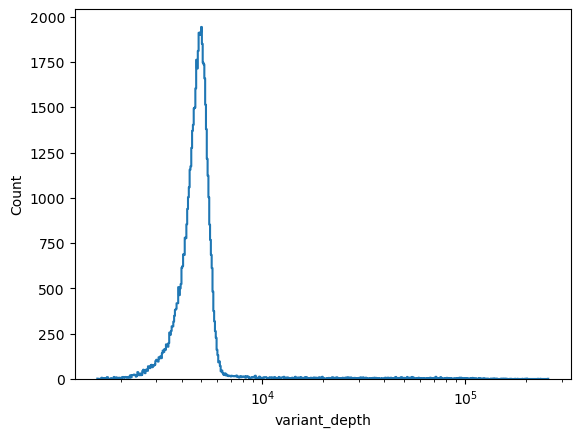

In [37]:
sns.histplot(data=y_chr_df, x='variant_depth',  log_scale=(True, False), fill=False, element='step')


## Example: TCIA-COVID-19_CT_Images study from MIDRC
## Objective
The API method makes use of graphQL query with Gen3 SDK to bring in data from MIDRC into BRH Workspace. 

> In this tutorial, we will be bringing in the longitudinal Framingham
> heart study from [MIDRC Data Commons](https://data.midrc.org)

## Pre-requiste
1. MIDRC  is Linked in the [BRH Profile Page](https://brh.data-commons.org/identity)
2. Structure of the [MIDRC Dictionary](https://data.midrc.org/DD) is known

## Steps
1. Use relevant gen3 API query function to pass the graphql query and bring in data [Reference](https://uc-cdis.github.io/gen3sdk-python/_build/html/_modules/gen3/query.html#Gen3Query.query) 

> You can search for the TCIA-COVID-19_CT_Images in the BRH discovery page. Search
> for "TCIA-COVID-19_CT_Images" in the [discovery page](https://brh.data-commons.org/discovery). Click on the study. In this case there is no project_id defined in the study description. Let's check the MIDRC MDS for project_id field.
Note, this data needs to be re-ingested in the MDS. 
Testing using "TCIA-COVID-19_CT_Images" as the project ID to construct our query
> You can learn about the fields parameter for imaging_data_file in the docs (search for "imaging_data_file" in the Schema) [here] (https://data.midrc.org/query)



In [38]:
commons_url = "https://data.midrc.org"
auth = Gen3Auth(commons_url, refresh_file="/home/jovyan/.gen3/credentials.json")
sub = Gen3Submission(commons_url, auth) # Initialize an instance this class, using your creds in 'auth'
query = Gen3Query(auth)

In [39]:
# This project_id field is not in MIDRC MDS yet, so tcia_files returns empty results
# This will be re-ingested in MIDRC and a project_id defined and then this query will
# work

In [40]:
tcia_files = query.query(
    data_type="dataset",
    first=5,
    fields=[
        "data_type",
        "file_name",
        "project_id",
        "object_id",
        "node_id"
    ],
    filters={"project_id": "TCIA-COVID-19_CT_Images"}
)

In [41]:
tcia_files

{'data': {'dataset': []}}